In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [2]:
data = pd.read_csv('British Airway Review.csv')
df = data.copy()

In [3]:
df.head()

,Date,Rating,Review Heading,User info,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Recommended,Aircraft,Type Of Traveller,Route,Date Flown,Ground Service,Wifi & Connectivity
0,2011-10-11,4/10,British Airways customer review,\n\nC Volz (United States) 11th October 2011,London City-New York JFK via Shannon on A318 b...,Premium Economy,1.0,3.0,5.0,NaN,1.0,no,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-10-09,4/10,British Airways customer review,\n\nRuss King (United Kingdom) 9th October 2011,SIN-LHR BA12 B747-436 First Class. Old aircraf...,First Class,4.0,5.0,5.0,2.0,2.0,no,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-23,9/10,"""cabin crew excellent""",\n\nE Smyth (United Kingdom) 23rd November 2023,✅ Trip Verified | Quick bag drop at First Win...,First Class,5.0,5.0,5.0,5.0,4.0,yes,A380,Couple Leisure,London to Miami,November 2023,4.0,2.0
3,2023-11-19,1/10,"""Service level far worse then Ryanair""",\n\nL Keele (Germany) 19th November 2023,✅ Trip Verified | 4 Hours before takeoff we r...,Economy Class,1.0,1.0,NaN,NaN,1.0,no,NaN,Couple Leisure,London to Stuttgart,November 2023,1.0,NaN
4,2023-11-19,3/10,"""do not upgrade members based on status""",\n\nAustin Jones (United States) 19th November...,✅ Trip Verified | I recently had a delay on B...,Economy Class,2.0,3.0,1.0,2.0,2.0,no,A320,Business,Brussels to London,November 2023,1.0,2.0


## Make Rating a whole number (which is rated over 10)

In [4]:
df.Rating=df.Rating.str.replace('/10','')

## Replace "(quotation mark) with ''(empty string)

In [5]:
df['Review Heading']=df['Review Heading'].str.replace('\"', '')

## Rename the column User info to User Info

In [6]:
df.rename({'User info': 'User Info'}, axis=1, inplace=True)

## Split the data in User Info  Reviewer Name, Reviewer Country and then drop the User Info column and Other Info which was created

In [7]:
df[['Reviewer Name','Other Info']] = df['User Info'].str.strip().str.split('(', expand=True)


In [8]:
df['Reviewer Name']=df['Reviewer Name'].str.strip()

In [9]:
df['Reviewer Country']=df['Other Info'].str.split(')').str[0]

In [10]:
df=df.drop('User Info', axis=1)

In [11]:
df= df.drop('Other Info', axis= 1)

## Check DataFrame

In [12]:
df.head()

,Date,Rating,Review Heading,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Recommended,Aircraft,Type Of Traveller,Route,Date Flown,Ground Service,Wifi & Connectivity,Reviewer Name,Reviewer Country
0,2011-10-11,4,British Airways customer review,London City-New York JFK via Shannon on A318 b...,Premium Economy,1.0,3.0,5.0,NaN,1.0,no,NaN,NaN,NaN,NaN,NaN,NaN,C Volz,United States
1,2011-10-09,4,British Airways customer review,SIN-LHR BA12 B747-436 First Class. Old aircraf...,First Class,4.0,5.0,5.0,2.0,2.0,no,NaN,NaN,NaN,NaN,NaN,NaN,Russ King,United Kingdom
2,2023-11-23,9,cabin crew excellent,✅ Trip Verified | Quick bag drop at First Win...,First Class,5.0,5.0,5.0,5.0,4.0,yes,A380,Couple Leisure,London to Miami,November 2023,4.0,2.0,E Smyth,United Kingdom
3,2023-11-19,1,Service level far worse then Ryanair,✅ Trip Verified | 4 Hours before takeoff we r...,Economy Class,1.0,1.0,NaN,NaN,1.0,no,NaN,Couple Leisure,London to Stuttgart,November 2023,1.0,NaN,L Keele,Germany
4,2023-11-19,3,do not upgrade members based on status,✅ Trip Verified | I recently had a delay on B...,Economy Class,2.0,3.0,1.0,2.0,2.0,no,A320,Business,Brussels to London,November 2023,1.0,2.0,Austin Jones,United States


## Check for missing values

In [13]:
df.isna().sum()

Date                         0
Rating                       0
Review Heading               0
Review                       0
Seat Type                    2
Seat Comfort               116
Cabin Staff Service        127
Food & Beverages           386
Inflight Entertainment    1151
Value For Money              1
Recommended                  0
Aircraft                  1781
Type Of Traveller          773
Route                      777
Date Flown                 780
Ground Service             848
Wifi & Connectivity       3094
Reviewer Name                0
Reviewer Country             2
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    3704 non-null   object 
 1   Rating                  3704 non-null   object 
 2   Review Heading          3704 non-null   object 
 3   Review                  3704 non-null   object 
 4   Seat Type               3702 non-null   object 
 5   Seat Comfort            3588 non-null   float64
 6   Cabin Staff Service     3577 non-null   float64
 7   Food & Beverages        3318 non-null   float64
 8   Inflight Entertainment  2553 non-null   float64
 9   Value For Money         3703 non-null   float64
 10  Recommended             3704 non-null   object 
 11  Aircraft                1923 non-null   object 
 12  Type Of Traveller       2931 non-null   object 
 13  Route                   2927 non-null   object 
 14  Date Flown              2924 non-null   

## Calculate How often reviewer give ratings

In [15]:
df['Reviewer Name'].value_counts()

Clive Drake                      32
E Smyth                          31
31 reviews\n\n\n\nDavid Ellis    27
David Ellis                      16
R Vines                          14
                                 ..
A Thadaram                        1
C Bowen                           1
C Norton                          1
A George                          1
Avril Barclay                     1
Name: Reviewer Name, Length: 2962, dtype: int64

## Further Clean Reviewer Name column

In [16]:
df['Reviewer Name']=df['Reviewer Name'].str.split('\n').str[-1]

## Explore the reviewer country

In [17]:
df[df['Reviewer Country'].isna()]

,Date,Rating,Review Heading,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Recommended,Aircraft,Type Of Traveller,Route,Date Flown,Ground Service,Wifi & Connectivity,Reviewer Name,Reviewer Country
3060,2015-04-08,2,British Airways customer review,I travelled from London to Jo'burg and back on...,Business Class,1.0,5.0,3.0,4.0,1.0,no,NaN,NaN,NaN,NaN,NaN,NaN,S Stevenson 8th April 2015,None
3366,2014-10-20,6,British Airways customer review,St Lucia to London round trip. Full flight bot...,Economy Class,4.0,3.0,4.0,2.0,3.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,Guillaume Christian 20th October 2014,None


## drop the columns


In [18]:
df=df.dropna(subset= 'Reviewer Country')

## Fill in missing values in seat type

In [19]:
df['Seat Type'].value_counts()

Economy Class      1927
Business Class     1197
Premium Economy     361
First Class         215
Name: Seat Type, dtype: int64

In [20]:
missing_seat_type=df[df['Seat Type'].isna()]
missing_seat_type

,Date,Rating,Review Heading,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Recommended,Aircraft,Type Of Traveller,Route,Date Flown,Ground Service,Wifi & Connectivity,Reviewer Name,Reviewer Country
2914,2015-06-17,1,British Airways customer review,Overall good experience. BA owns Vueling/Iberi...,NaN,1.0,4.0,3.0,2.0,1.0,no,NaN,Solo Leisure,Los Angeles to London to Paris to Rome,May 2015,1.0,2.0,Tom Moore,United States
2955,2015-05-31,4,British Airways customer review,Club World: Just flown London Gatwick to Las V...,NaN,1.0,2.0,1.0,3.0,1.0,no,NaN,NaN,NaN,NaN,NaN,NaN,Grant Cooper,United Kingdom


In [21]:
df['Seat Type']  = df['Seat Type'].fillna(df['Seat Type'].mode().item())

## Fill in missing Value of columns with float64

In [22]:
numerical=[]
for column in df.columns:
    if df[column].dtype == 'float64':
        numerical.append(column)
    

In [23]:
df[numerical]=df[numerical].fillna(df['Seat Comfort'].mean().round())

## Explore the Aircraft column

In [24]:
df['Aircraft'].value_counts()

A320                     366
Boeing 777               272
Boeing 747-400           182
A380                     167
Boeing 777-200           125
                        ... 
A319 / Boeing 787-9        1
Boeing 747-400 / A319      1
A320 / Boeing 747-400      1
Boeing 777 / A380          1
Airbus 319                 1
Name: Aircraft, Length: 202, dtype: int64

## Drop the column

In [25]:
df=df.drop('Aircraft', axis =1 )

## Explore Type of Traveller column

In [26]:
df['Type Of Traveller'].value_counts()

Couple Leisure    1001
Solo Leisure       891
Business           641
Family Leisure     398
Name: Type Of Traveller, dtype: int64

## Drop the column

In [27]:
df=df.drop('Type Of Traveller', axis=1)

## Explore the route column

In [28]:
df['Route'].value_counts()

London to Johannesburg                       17
London to Cape Town                          15
London to Hong Kong                          13
Vancouver to London                          13
LHR to MIA                                   13
                                             ..
Los Angeles to Leeds via London Heathrow      1
Kuala Lumpur to London Heathrow               1
Prague to Heathrow                            1
Calgary to Rome via London                    1
BOM-LHR                                       1
Name: Route, Length: 1592, dtype: int64

## Drop the column

In [29]:
df=df.drop('Route', axis=1)

## Explore the Date Flown Column

In [30]:
df['Date Flown'].value_counts()

August 2015       83
September 2015    78
November 2015     66
April 2017        65
October 2015      64
                  ..
November 2014      2
October 2014       1
June 2020          1
August 2014        1
July 2014          1
Name: Date Flown, Length: 112, dtype: int64

## Convert the Date and Date Flown column to datatype datetime

In [31]:
df['Date Flown']=pd.to_datetime(df['Date Flown'])
df['Date']= pd.to_datetime(df['Date'])

## Fill in missing values in date flown with the equivalent value in date

In [32]:
df['Date Flown']=df['Date Flown'].fillna(df['Date'])

## set Date Flown to Months and year as in the initial format

In [33]:
df['Date Flown']=df['Date Flown'].dt.to_period('M')

## Change the datatype of Rating to float and fill in missing value

In [34]:
df['Rating']=df['Rating'].replace('na', np.nan).astype('float64')

In [35]:
df.head()

,Date,Rating,Review Heading,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Recommended,Date Flown,Ground Service,Wifi & Connectivity,Reviewer Name,Reviewer Country
0,2011-10-11,4.0,British Airways customer review,London City-New York JFK via Shannon on A318 b...,Premium Economy,1.0,3.0,5.0,3.0,1.0,no,2011-10,3.0,3.0,C Volz,United States
1,2011-10-09,4.0,British Airways customer review,SIN-LHR BA12 B747-436 First Class. Old aircraf...,First Class,4.0,5.0,5.0,2.0,2.0,no,2011-10,3.0,3.0,Russ King,United Kingdom
2,2023-11-23,9.0,cabin crew excellent,✅ Trip Verified | Quick bag drop at First Win...,First Class,5.0,5.0,5.0,5.0,4.0,yes,2023-11,4.0,2.0,E Smyth,United Kingdom
3,2023-11-19,1.0,Service level far worse then Ryanair,✅ Trip Verified | 4 Hours before takeoff we r...,Economy Class,1.0,1.0,3.0,3.0,1.0,no,2023-11,1.0,3.0,L Keele,Germany
4,2023-11-19,3.0,do not upgrade members based on status,✅ Trip Verified | I recently had a delay on B...,Economy Class,2.0,3.0,1.0,2.0,2.0,no,2023-11,1.0,2.0,Austin Jones,United States


## Sentimental Analysis

In [36]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [37]:
nltk.download('vader_lexicon')


[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10065] A socket operation was attempted to an
[nltk_data]     unreachable host>


False

In [38]:
sia = SentimentIntensityAnalyzer()

In [39]:
df['Sentiment']=df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [40]:
def classify(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score <= 0.05 and compound_score >=-0.05:
        return 'Neutral'
    else:
        return 'Negative'

In [41]:
df['Sentiment']=df['Sentiment'].apply(classify)

## Count how many positive, negative and neutral reviews

In [42]:
df['Sentiment'].value_counts()

Positive    2146
Negative    1507
Neutral       49
Name: Sentiment, dtype: int64

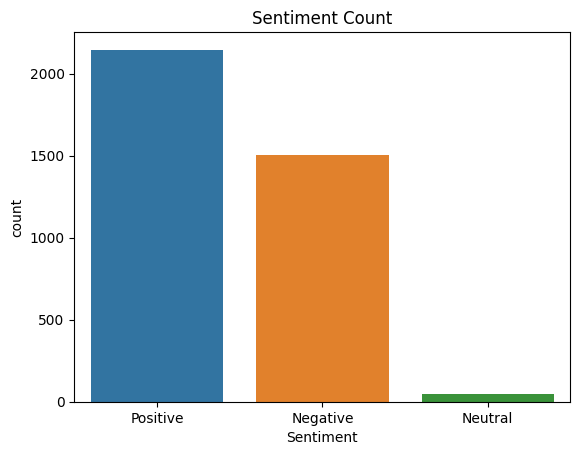

In [140]:
sns.countplot(data=df, x = 'Sentiment')
plt.title('Sentiment Count')
plt.savefig('Sentiment Count.png',bbox_inches='tight');

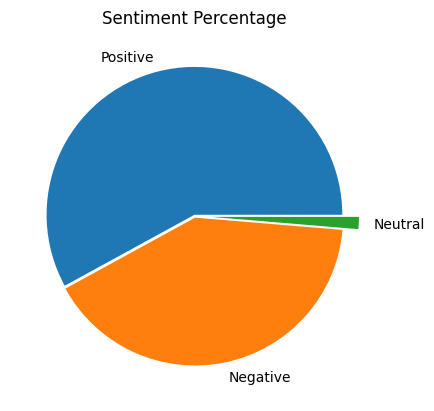

In [155]:
plt.pie(df['Sentiment'].value_counts(), labels = df['Sentiment'].unique(), explode=[.01,0.01,.11]);
plt.title('Sentiment Percentage')
plt.savefig('Sentiment Percentage.png',bbox_inches='tight')

## Calculate Average of the services

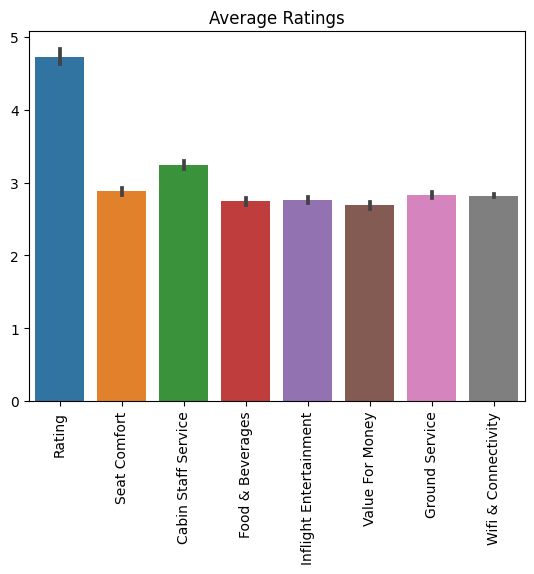

In [139]:
plt.title('Average Ratings')

plt.xticks(rotation=90)
tr=plt.xticks()
sns.barplot(data=df)

plt.savefig('Average Rating.png',bbox_inches='tight')

## Selected the numerical column to explore further based on sentiment

In [45]:
wanted_column = ['Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Value For Money',
                 'Ground Service','Wifi & Connectivity']

In [46]:
df_long=df.melt(id_vars='Sentiment', value_vars=wanted_column)

In [47]:
df_long

,Sentiment,variable,value
0,Positive,Rating,4.0
1,Positive,Rating,4.0
2,Positive,Rating,9.0
3,Negative,Rating,1.0
4,Negative,Rating,3.0
...,...,...,...
29611,Negative,Wifi & Connectivity,3.0
29612,Positive,Wifi & Connectivity,3.0
29613,Positive,Wifi & Connectivity,3.0
29614,Positive,Wifi & Connectivity,3.0


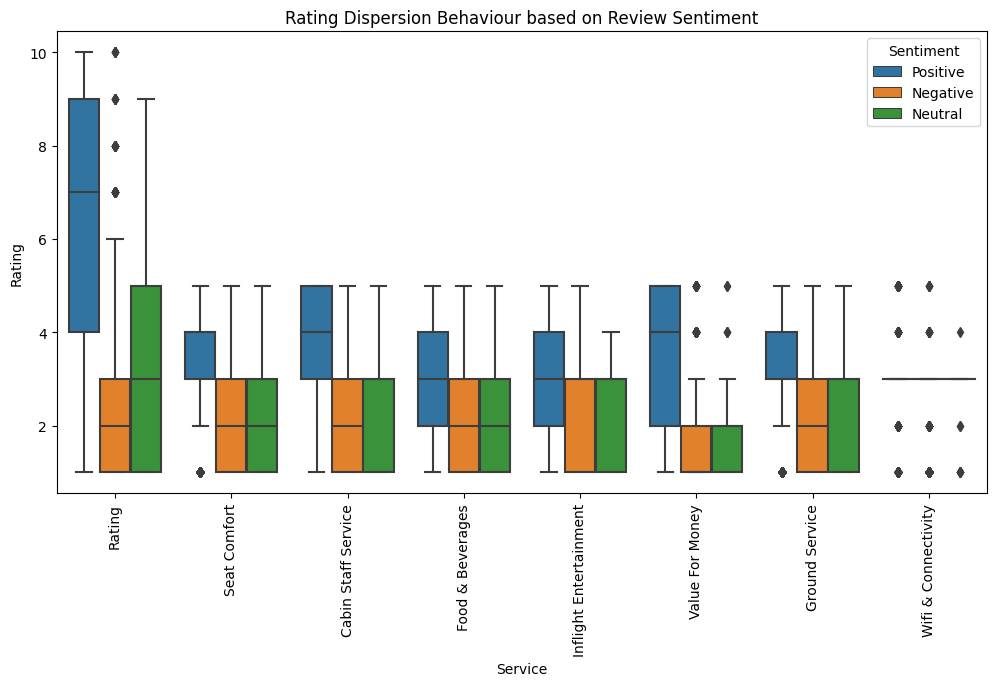

In [157]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_long, x='variable', y='value', hue='Sentiment')

plt.title('Rating Dispersion Behaviour based on Review Sentiment')
plt.xticks(rotation=90)
plt.xlabel('Service')

plt.ylabel('Rating')

plt.savefig('Rating Dispersion.png',bbox_inches='tight');

## Average by Sentiment

In [49]:
sentiment_average=df.groupby('Sentiment').mean()
sentiment_average

,Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Ground Service,Wifi & Connectivity
Sentiment,,,,,,,,
Negative,2.424202,2.158593,2.436629,2.040478,2.382216,1.737890,2.179164,2.667551
Neutral,3.204082,2.367347,2.530612,2.265306,2.469388,1.897959,2.387755,2.734694
Positive,6.383862,3.395620,3.825256,3.248369,3.031221,3.372321,3.303821,2.933830


## Create a word cloud

In [50]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [51]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10065] A
[nltk_data]     socket operation was attempted to an unreachable host>


False

## Get all the words together as a string, and also for positive, negative and neutral reviews

In [54]:
word_bank = ' '.join([sentence for sentence in df['Review']])
positive_word = ' '.join([sentence for sentence in df[df['Sentiment']=='Positive']['Review']])
negative_word = ' '.join([sentence for sentence in df[df['Sentiment']=='Negative']['Review']])
neutral_word = ' '.join([sentence for sentence in df[df['Sentiment']=='Neutral']['Review']])

## Create a word cloud

In [55]:
wordcloud = WordCloud(width=800, height=500).generate(word_bank)
positive_wordcloud = WordCloud(width=800, height=500).generate(positive_word)
negative_wordcloud = WordCloud(width=800, height=500).generate(negative_word)
neutral_wordcloud = WordCloud(width=800, height=500).generate(neutral_word)


## Display the word cloud

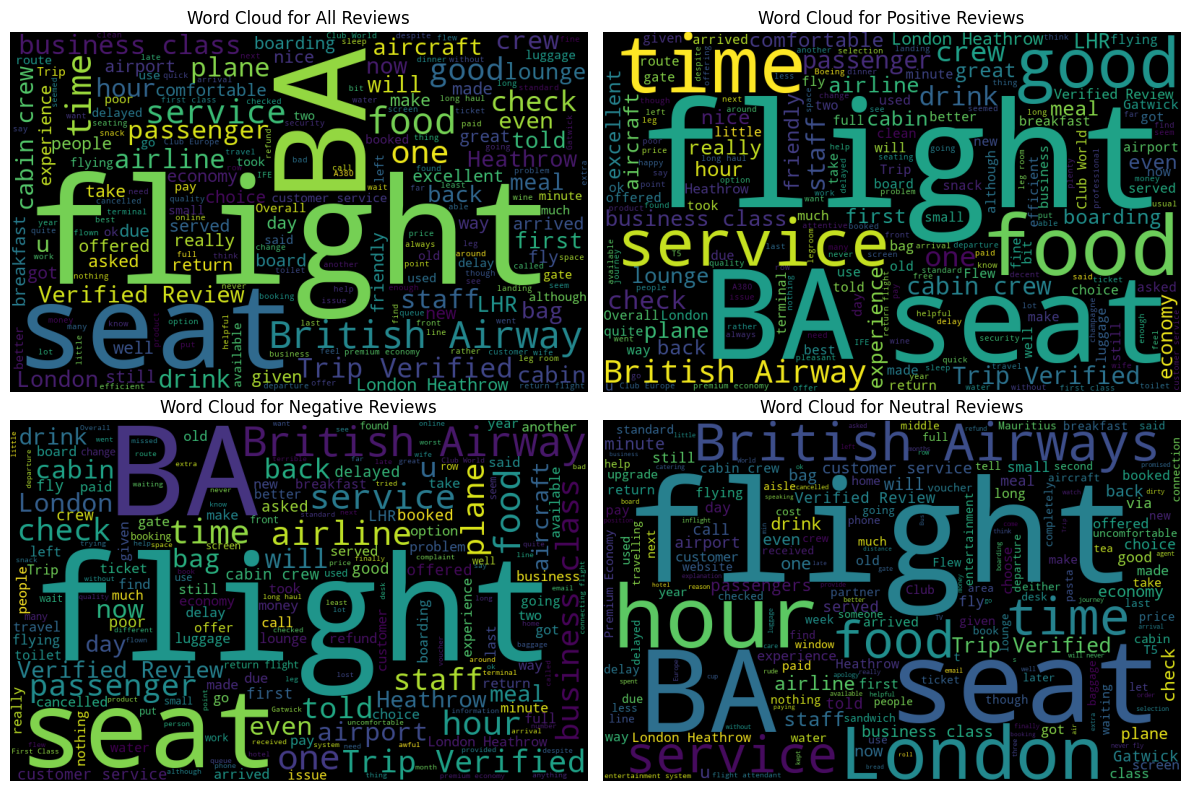

In [166]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0][0].imshow(wordcloud)
ax[0][0].axis('off')
ax[0][0].set_title('Word Cloud for All Reviews')

ax[0][1].imshow(positive_wordcloud)
ax[0][1].axis('off')
ax[0][1].set_title('Word Cloud for Positive Reviews')

ax[1][0].imshow(negative_wordcloud)
ax[1][0].axis('off')
ax[1][0].set_title('Word Cloud for Negative Reviews')

ax[1][1].imshow(neutral_wordcloud)
ax[1][1].axis('off')
ax[1][1].set_title('Word Cloud for Neutral Reviews')

plt.tight_layout()

# Save the figure before showing it
plt.savefig('WordCloud.jpg')

# Show the figure
plt.show()


## Check how often words are used getting the top ten words for general, positive, negative and neutral review

In [131]:
def count(word_bank):
    word_count={}
    exception = stopwords.words('english')

    for word in word_bank.split():
        if word in word_count and word.lower() not in exception and len(word)>1:
            word_count[word]+=1
        elif word not in word_count and word.lower() not in exception and len(word)>1:
            word_count[word]=1

    return word_count

In [132]:
general_count=count(word_bank)
positive_count = count(positive_word)
negative_count =count(negative_word)
neutral_count = count(neutral_word)

In [133]:
word_count=pd.DataFrame([general_count, positive_count, negative_count, neutral_count], index=['General','Positive','Negative','Neutral']).T

In [167]:
def top(category, word_count=word_count):
    data = word_count.sort_values(category, ascending=False)[:10][category]

    plt.title('Top 10 Used word in '+category+' Reviews')
    sns.barplot(x=data.index,y=data)
    plt.xticks(rotation=90)
    
    plt.xlabel('Word')
    plt.ylabel('No. of time used')
    plt.savefig(f'Top {category}.png')
    
    return plt.figure()


<Figure size 640x480 with 0 Axes>

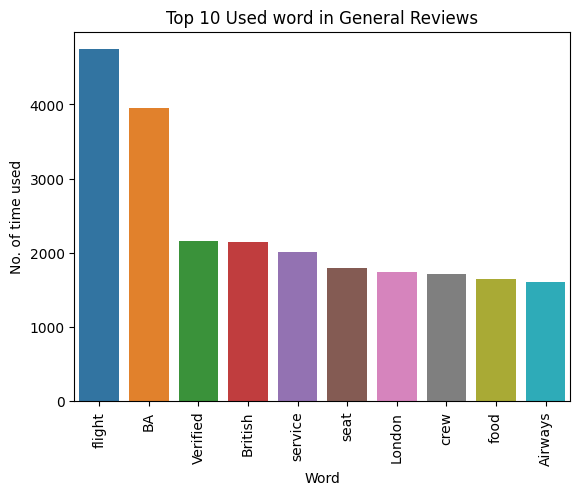

<Figure size 640x480 with 0 Axes>

In [169]:
top('General')


<Figure size 640x480 with 0 Axes>

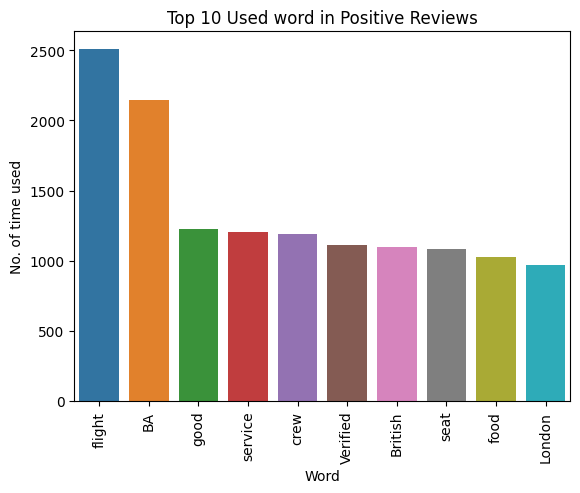

<Figure size 640x480 with 0 Axes>

In [170]:
top('Positive')

<Figure size 640x480 with 0 Axes>

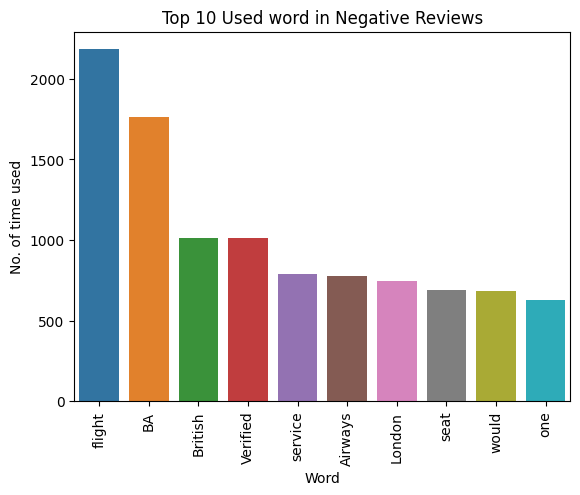

<Figure size 640x480 with 0 Axes>

In [171]:
top('Negative')

<Figure size 640x480 with 0 Axes>

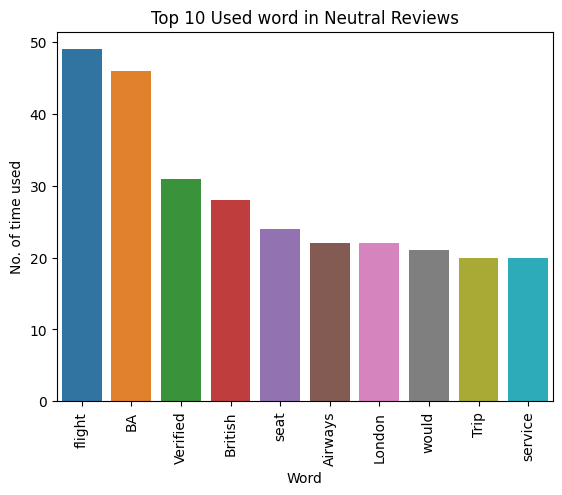

<Figure size 640x480 with 0 Axes>

In [172]:
top('Neutral')